<a href="https://colab.research.google.com/github/nyary-ben/Homework-6B/blob/main/Homework6B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install whit-phys-util 1>/dev/null

In [2]:
import pandas as pd
import whit_phys_util as buc
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, exp, sqrt

In [3]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

In [4]:
repo = buc.local_repository("https://github.com/nyary-ben/Homework-6B")

Repository exists at this location. Pulling changes from GitHub.


# Problem 6.23

### Part a
* The formula to be used with N+1 terms is $Z_{rot,N}$ = $\sum (2j+1)e^{-j(j+1) \epsilon \beta}$ where $\beta$ = $\frac{1}{kT}$.

In [5]:
epsi = 0.00024 #eV
T  = 300 # K
k = 8.617*10**-5 #eV/K
beta = 1/(k*T)

def Z_rot(n_array):
    results = []
    for N in n_array:
        N = int(N)
        Z = 0
        for j in range(N + 1):
            Z += ((2 * j) + 1) * np.exp(-j * (j + 1) * epsi * beta)
        results.append(Z)
    return np.array(results)

(0.0, 120.0)

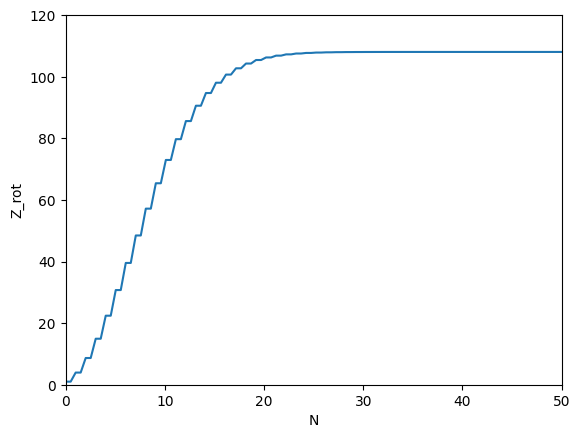

In [6]:
x_vals = np.linspace(1e-9, 50, 100)
y_vals = Z_rot(x_vals)

fig, ax1 = plt.subplots()
ax1.plot(x_vals, y_vals)
ax1.set_xlabel('N')
ax1.set_ylabel('Z_rot')
ax1.set_xlim(0, 50)
ax1.set_ylim(0, 120)


### Part b
* The value of $Z_{rot}$ at $N$ = $50$ is $Z_{rot}$ = $108.05$.

### Part c
* $1 \%$ of $108.05$ = $1.0805$.
* To be within the range of this value, the closest value of $Z_{rot}$ = $1$ which will be at $N$ = $0$.

### Part d
* The high temperature formula is $Z_{rot-high}$ = $\frac {kT}{\epsilon}$.
* The $Z_{rot-high}$ = $107.71$

In [7]:
kT = k * T
Z_rot_high = kT / epsi
print(Z_rot_high)

107.7125


### Part e
* Percent error is $0.32 \%$

In [8]:
PE = (108.05-107.71)/107.71*100
print(PE)

0.3156624268870146


# Problem 6.29

### Part a
* We know that HD molecule is a perfectly harmonic molecule as it has a relatively small moment of inertia.
* So we know that $E_{(s)}$ = $j(j+1)\epsilon$ and $C$ = $\frac{1}{kT^2} \sigma^2$.
* $Z$ = $\sum (2j+1)e^{-j(j+1)\epsilon\beta}$ and $\sigma^2$ = $\frac{1}{Z}\sum\epsilon^2e^{-j(j+1)\epsilon\beta}(2j^5+5j^4+4j^3+j^2)$ - $\frac{1}{Z^2}\sum\epsilon^2e^{-2j(j+1)\epsilon\beta}(2j^3+3j^2+j)^2$.

### Part b

In [9]:
epsi = 0.0057 #eV
k = 8.617*10**-5 #eV/K
def Z(N, Tb):
  Z = 0
  for j in range(2):
    Z += ((2*j)+1)*np.exp(-(epsi*j*(j+1))/(k*Tb))
  return Z

def sigsq(Tb):
  sigsq = 0
  for j in range(2):
      term1 = ((2*j**5 + 5*j**4 + 4*j**3 + j**2) * (epsi**2) * np.exp(-(epsi*j*(j+1)) / (k*Tb))) / Z(2, Tb)
      term2 = ((2*j**3 + 3*j**2 + j)**2 * (epsi**2) * np.exp(-(2*epsi*j*(j+1)) / (k*Tb))) / Z(2, Tb)**2
      sigsq += term1 - term2
  return sigsq
def C(Tb):
  return 1/(k*(Tb**2))*sigsq(Tb)
R = 8.314/(1.602*10**-19) # eV/mol*K
f = 5 #degrees of freedom of diatomic molecule
C_equi = (f*R*2)/(2*(6.022*10**23))

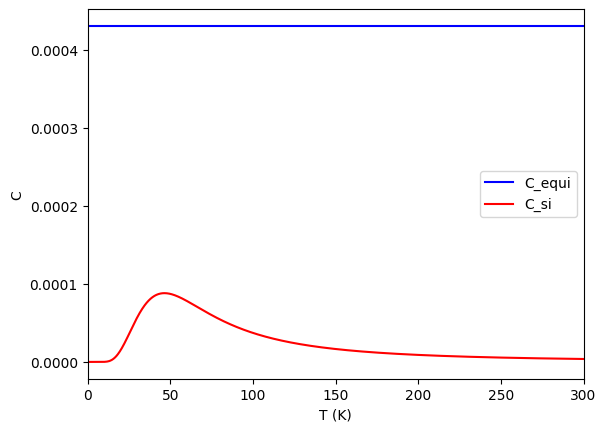

In [10]:
x_vals1 = np.linspace(1, 300, 1000)

fig, ax2 = plt.subplots()

ax2.plot(x_vals1, np.full_like(x_vals1, C_equi), color='blue', label='C_equi')
ax2.plot(x_vals1, C(x_vals1), color='red', label='C_si');
ax2.set_xlabel('T (K)');
ax2.set_ylabel('C');
ax2.set_xlim(0, 300);
ax2.legend();


### Part c
* I would guess the answer to be around 45K as that would be where the peak of $C_{si}$ would be. I know that the graph should look like the two lines cross each other and assuming that my $C_{si}$ would have an arithmetic error, I would make an estimated guess.

# Problem 6.33
The Maxwell distribution of speeds for an ideal gas like $O_{2}$ molecule is
$$D(v) = \frac{4}{\sqrt{\pi}} v^2 e^{-v^2}$$
where $v$ is in units of $v_0 = \sqrt{2kT/m}$

In [11]:
def D(v):
  return 4/sqrt(pi)*v**2*exp(-v**2)
k3 = 1.381*10**-23 # J/K
T3 = 300 #K
m = 0.032/(6.022*10**23) #kg
v_0 = np.sqrt((2*k3*T3)/m) #m/s

### Most probable speed

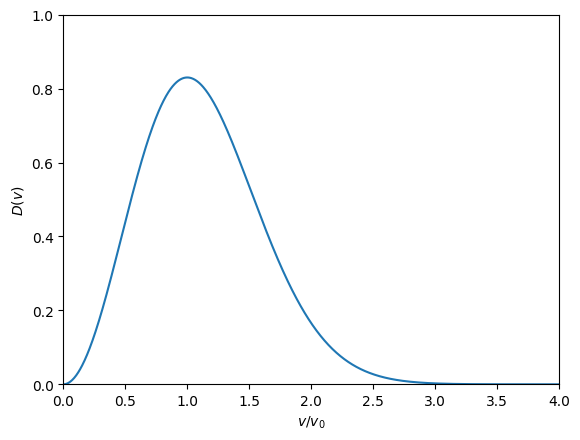

In [12]:
fig, ax = plt.subplots()
v = np.linspace(0,4,1000)
ax.plot(v,D(v));
ax.set_xlabel('$v/v_0$');
ax.set_ylabel('$D(v)$');
ax.set_xlim(0,4);
ax.set_ylim(0,1);

* Most problable speed occurs where the slope of the curve is 0.

In [13]:
from scipy.optimize import minimize_scalar
vmp1 = minimize_scalar(lambda v: -D(v), bounds=(0,4)).x
vmp = vmp1*v_0
print(f'The most probable speed is {vmp:.2f} m/s')

The most probable speed is 394.88 m/s


### Average speed
* This occurs at the integral of $vD(v)$ over 0 to infinity.

In [14]:
from scipy.integrate import quad
integral_results = quad(lambda v: v*D(v),0,np.inf)
vavg1 = integral_results[0]
vavg = vavg1*v_0
print(f'The average speed is {vavg:.2f} m/s')

The average speed is 445.58 m/s


### RMS speed
* This occurs at the square root of the integral of $v^2D(v)$.

In [15]:
vrms1 = sqrt(quad(lambda v: v**2*D(v),0,np.inf)[0])
vrms = vrms1*v_0
print(f'The rms speed is {vrms:.2f} m/s')

The rms speed is 483.63 m/s


# Problem 6.34
$$D(v) = (\frac{m}{2\pi kT})^{1.5} 4\pi v^2 e^{-\frac{mv^2}{2kT}}$$

In [16]:
m_ni = 0.028/(6.022*10**23) #kg
T_ni1 = 300 #K
T_ni2 = 600 #K
C_1 = 4*np.pi*(m_ni/(2*np.pi*k3*T_ni1))**1.5
C_2 = 4*np.pi*(m_ni/(2*np.pi*k3*T_ni2))**1.5
e_1 = m_ni/(2*k3*T_ni1)
e_2 = m_ni/(2*k3*T_ni2)

def D_1(v):
  return np.exp(-e_1*v**2)*C_1*v**2
def D_2(v):
  return np.exp(-e_2*v**2)*C_2*v**2


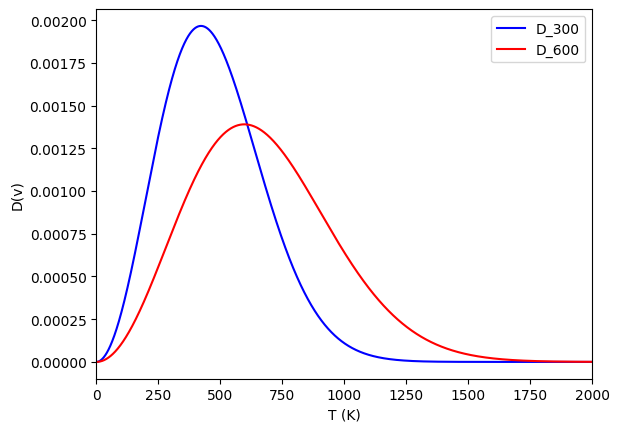

In [17]:
x_vals2 = np.linspace(0, 2000, 10000)

fig, ax3 = plt.subplots()

ax3.plot(x_vals2, D_1(x_vals2), color='blue', label='D_300');
ax3.plot(x_vals2, D_2(x_vals2), color='red', label='D_600');
ax3.set_xlabel('T (K)');
ax3.set_ylabel('D(v)');
ax3.set_xlim(0, 2000);
ax3.legend();

# Problem 6.39

### Part a
* We will have to find the probability ($v>11,000m/s$) = $4\pi(\frac{m}{2\pi kT})^{1.5} \int_{11000 m/s}^{\infty}{v^2e^{-\frac{mv^2}{2kT}}dv}$
* But I will use the version in which it is equal to $$P = \frac{4}{\sqrt \pi}\int_{x_{min}}^{\infty}{x^2e^{-x^2}dx}$$ where $x_{min}$ = $\frac{v}{v_{max}}$ and $x$ = $v\sqrt \frac{m}{2kT}$.

In [18]:
T_ea = 1000 #K
x_min = 11000/422
C_ea = 4*np.sqrt(np.pi)
def prob(x):
  return (x**2)*np.exp(-x**2)
x1 = np.linspace(1,4,10)

Prob_ea = quad(prob, x_min, np.inf)[0]
Prob = Prob_ea*C_ea
print(f'The probability of escape of nitrogen molecule is {Prob:.2e}')

The probability of escape of nitrogen molecule is 7.63e-294


### Part b

In [19]:
M_h2 = 0.002/(6.022*10**23) # mass of hydrogen molecule
M_he = 0.004/(6.022*10**23) # mass of helium atom
x_minh = 11000/(np.sqrt(M_h2/2*k3*T_ea))
x_minhe = 11000/(np.sqrt(M_he/2*k3*T_ea))
Prob_h2 = quad(prob, x_minh, np.inf)[0]
Prob_he = quad(prob, x_minhe, np.inf)[0]
Probh2 = Prob_h2*C_ea
Probhe = Prob_he*C_ea
print(f'The probability of escape of hydrogen molecule is {Probh2:.2e}')
print(f'The probability of escape of helium atom is {Probhe:.2e}')

The probability of escape of hydrogen molecule is 0.00e+00
The probability of escape of helium atom is 0.00e+00


It is more probable for the nitrogen molecule to escape the upper surface of the Earth than the helium atom or hydrogen molecule. This could be explained by these difference in mass causing the $v_{max}$ of the hydrogen and helium to be significantly lower than the nitrogen molecule so 11000m/s is too far of a stretch from their respective $v_{max}$.

### Part C

In [20]:
T_ea = 1000 #K
x_mo = 2400/422
C_ea = 4*np.sqrt(np.pi)
def prob(x):
  return (x**2)*np.exp(-x**2)

Prob_mo = quad(prob, x_mo, np.inf)[0]
Prob = Prob_mo*C_ea
print(f'The probability of escape on the moon is {Prob:.2e}')

The probability of escape on the moon is 1.84e-13


* This further explains my previous explanation as the closer the escape speed from the $v_{max}$ the more probable of it to happen.

# Problem 6.47
* We know that $l_{Q}$ = $\frac{h}{\sqrt2\pi mkT}$ and when the translational motion of a molecule would freeze out, $l_{Q}$ = $L$.
* So $T$ = $(\frac{h}{L})^2\frac{1}{2\pi mk}$.

In [21]:
h = 6.626*10**-34 #J*s
L = 0.01 #m
m = m_ni #kg
T_est = (h/L)**2/(2*np.pi*m*k3)
print(f'The estimated temperature is {T_est:.2e} K')

The estimated temperature is 1.09e-15 K


In [22]:
# buc.notebook_to_pdf(repo, author = "Ny Ary Razafindramamba", title = "Homework 6B")